**Import Needed Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

from sklearn import metrics
from warnings import filterwarnings
filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


**Data Collection and Processing**

In [ ]:
data = pd.read_csv("/content/Electronic_sales_Sep2023-Sep2024.csv")

In [ ]:
data.sample(5)

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
8011,8203,74,Male,No,Smartphone,SKU1004,2,Completed,Credit Card,5538.33,791.19,7,2024-06-08,Standard,Impulse Item,12.74
448,1401,23,Female,No,Smartwatch,SKU1003,3,Cancelled,Debit Card,3379.32,844.83,4,2023-12-27,Standard,"Impulse Item,Impulse Item,Accessory",62.86
19175,19268,72,Female,No,Headphones,HDP456,2,Completed,PayPal,2889.44,361.18,8,2024-03-12,Same Day,"Accessory, Accessory",172.90
13930,14507,30,Male,No,Smartphone,SMP234,1,Completed,Credit Card,4558.72,1139.68,4,2024-05-18,Standard,"Accessory, Accessory, Extended Warranty",211.64
19343,19419,70,Female,No,Tablet,TBL345,3,Cancelled,Credit Card,4718.46,786.41,6,2024-05-18,Expedited,NaN,0.00


In [ ]:
#print number of rows and columns separately

print("Number of Rows:",data.shape[0])
print("Number of Features:",data.shape[1])

Number of Rows: 20000
Number of Features: 16


In [ ]:
#see dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        20000 non-null  int64  
 1   Age                20000 non-null  int64  
 2   Gender             19999 non-null  object 
 3   Loyalty Member     20000 non-null  object 
 4   Product Type       20000 non-null  object 
 5   SKU                20000 non-null  object 
 6   Rating             20000 non-null  int64  
 7   Order Status       20000 non-null  object 
 8   Payment Method     20000 non-null  object 
 9   Total Price        20000 non-null  float64
 10  Unit Price         20000 non-null  float64
 11  Quantity           20000 non-null  int64  
 12  Purchase Date      20000 non-null  object 
 13  Shipping Type      20000 non-null  object 
 14  Add-ons Purchased  15132 non-null  object 
 15  Add-on Total       20000 non-null  float64
dtypes: float64(3), int64(4

In [ ]:
data.shape

(20000, 16)

In [ ]:
data.describe()

,Customer ID,Age,Rating,Total Price,Unit Price,Quantity,Add-on Total
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10483.526550,48.994100,3.093950,3180.133419,578.631867,5.485550,62.244848
std,5631.732525,18.038745,1.223764,2544.978675,312.274076,2.870854,58.058431
min,1000.000000,18.000000,1.000000,20.750000,20.750000,1.000000,0.000000
25%,5478.000000,33.000000,2.000000,1139.680000,361.180000,3.000000,7.615000
50%,10499.500000,49.000000,3.000000,2534.490000,463.960000,5.000000,51.700000
75%,15504.000000,65.000000,4.000000,4639.600000,791.190000,8.000000,93.842500
max,19998.000000,80.000000,5.000000,11396.800000,1139.680000,10.000000,292.770000


In [ ]:
data.isnull().sum()

,0
Customer ID,0
Age,0
Gender,1
Loyalty Member,0
Product Type,0
SKU,0
Rating,0
Order Status,0
Payment Method,0
Total Price,0


**Removing Unnecessary Features**

In [ ]:
# Drop specified columns
data = data.drop(['Add-ons Purchased', 'Add-on Total', 'Rating', 'Age', 'Customer ID'], axis=1)

**Numerical Features:**

Total Price
Unit Price
Quantity


**Categorical Features:**

Gender

Loyalty Member

Product Type

SKU

Order Status

Payment Method

Purchase Date

Shipping Type

**Columns that have null values:**

Gender


**Mode Method to handle Missing Values in Gender**

In [ ]:
#Calculate Mean of Total Price column
data['Total Price'].mean()

3180.1334185

In [ ]:
#Calculate Mean of Gender column
data['Gender'].mode()

,Gender
0,Male


In [ ]:
#Fill missing values in Item_Weight column with mean
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)

In [ ]:
#Check for missing values
data.isnull().sum()

,0
Gender,0
Loyalty Member,0
Product Type,0
SKU,0
Order Status,0
Payment Method,0
Total Price,0
Unit Price,0
Quantity,0
Purchase Date,0


**Data Analysis**

In [ ]:
#See descriptive statistics of numerical columns
data.describe()

,Total Price,Unit Price,Quantity
count,20000.000000,20000.000000,20000.000000
mean,3180.133419,578.631867,5.485550
std,2544.978675,312.274076,2.870854
min,20.750000,20.750000,1.000000
25%,1139.680000,361.180000,3.000000
50%,2534.490000,463.960000,5.000000
75%,4639.600000,791.190000,8.000000
max,11396.800000,1139.680000,10.000000


**Data Visualization of Numerical Feature**

In [ ]:
#applying Seaborn's default aesthetic settings to your plots
sns.set()

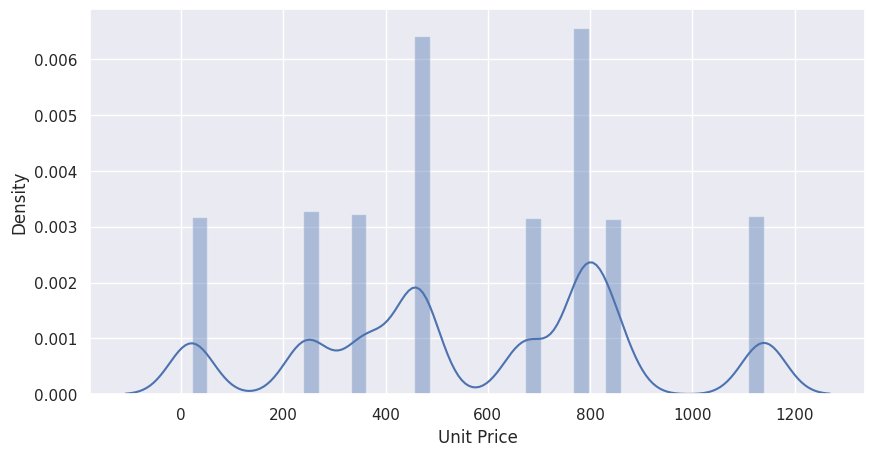

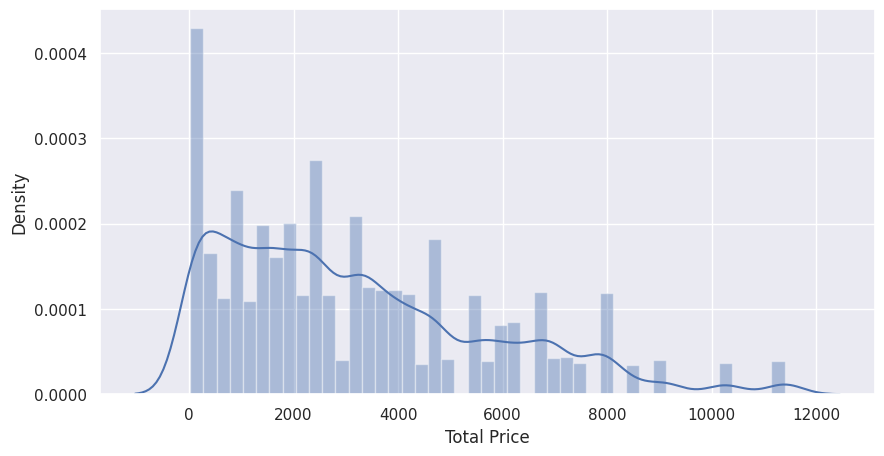

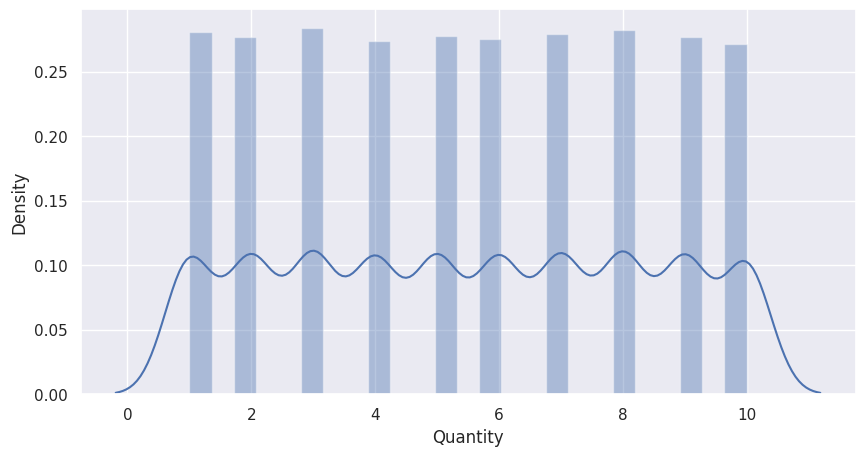

In [ ]:
#Plot distplot for numerical columns
cols = ['Unit Price','Total Price', 'Quantity']
for col in cols:
    plt.figure(figsize=(10,5))
    sns.distplot(data[col])
    plt.show()

**Data Visualization of Categorical Features**

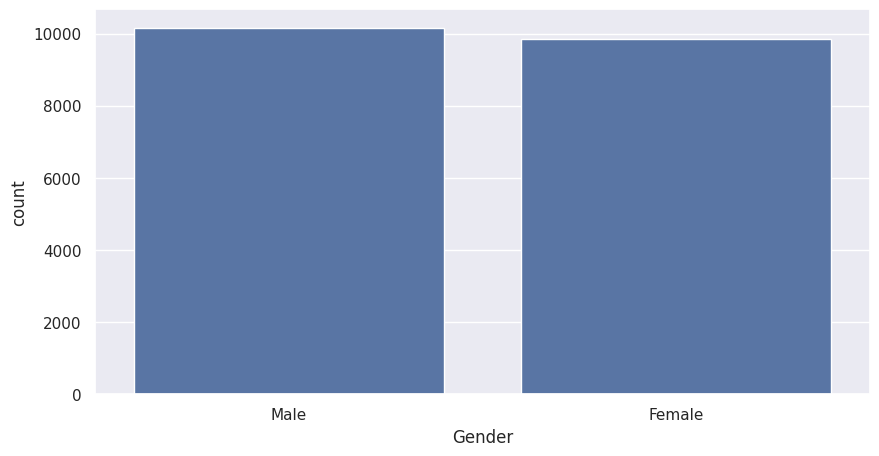

In [ ]:
#Plot countplot for Item_Fat_Content column
plt.figure(figsize=(10,5))
sns.countplot(x= "Gender" , data=data)
plt.show()

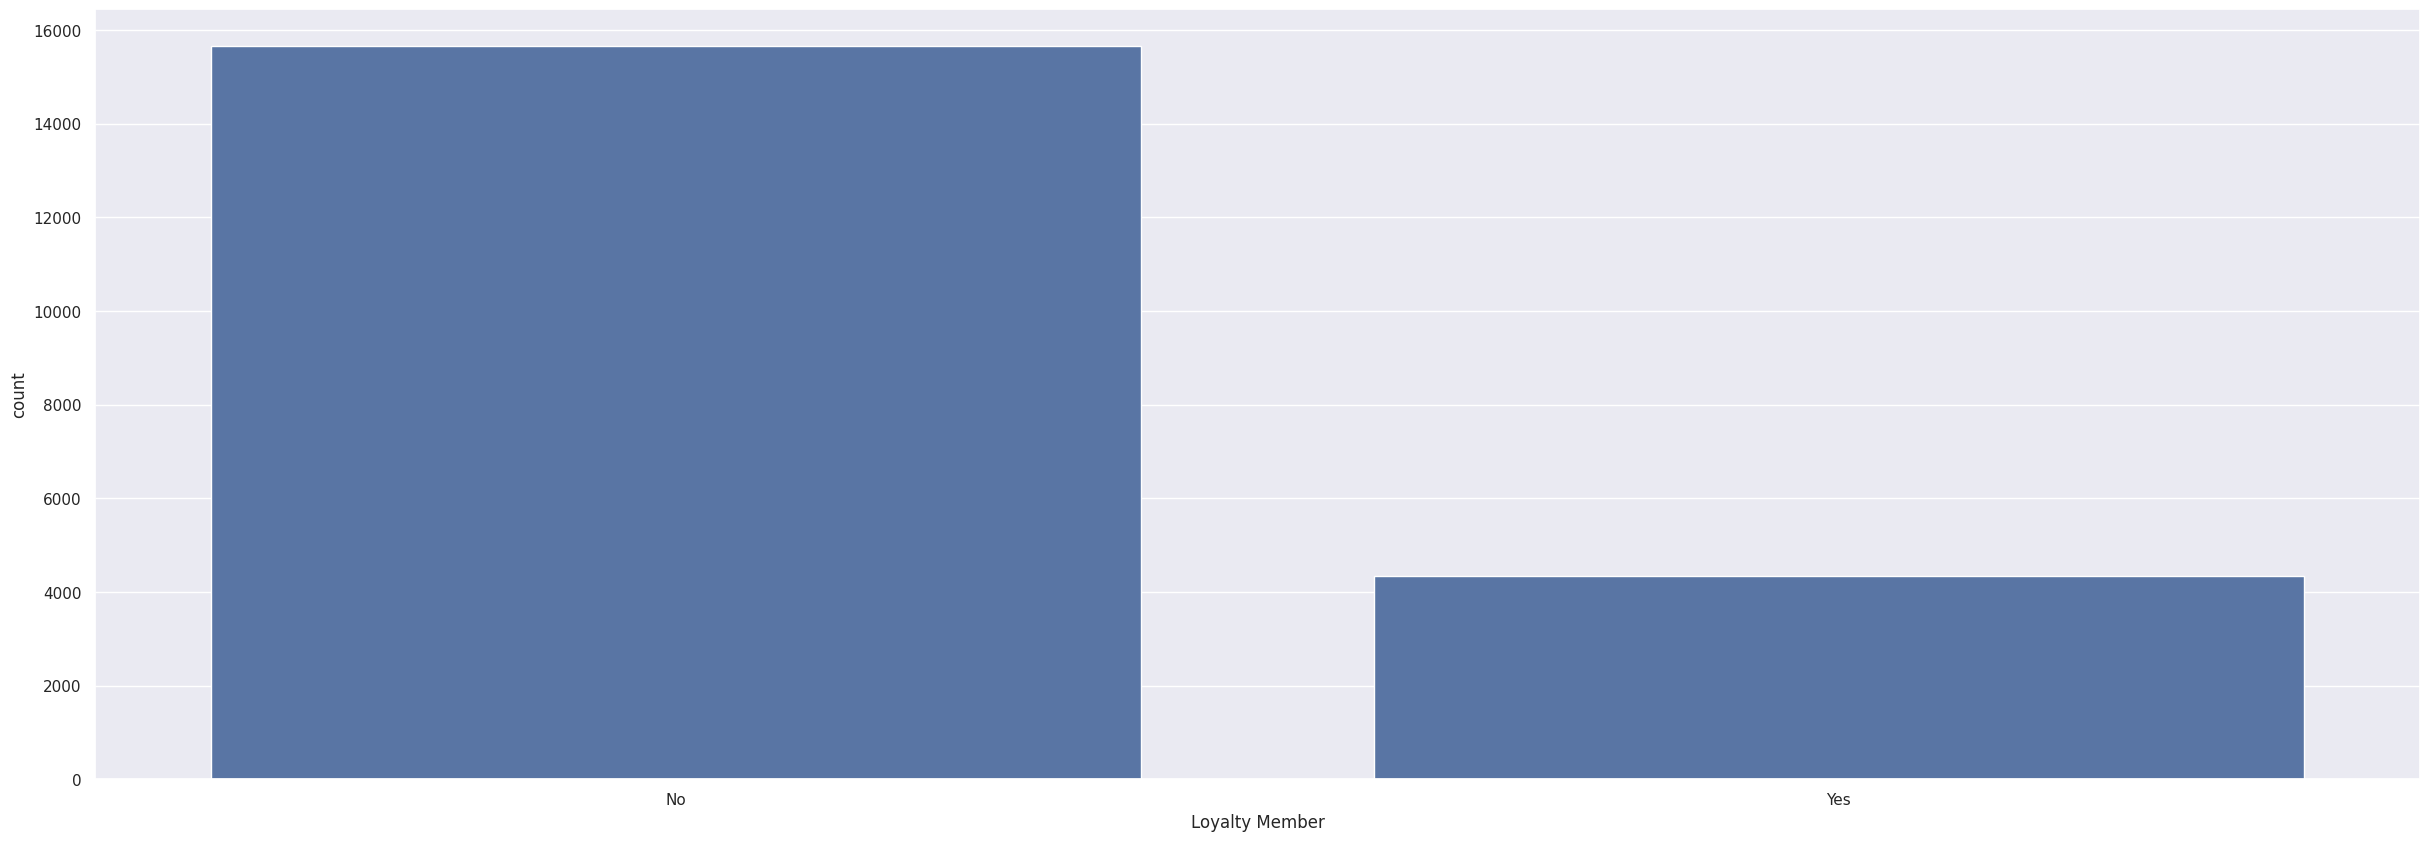

In [ ]:
#Plot countplot for Item_Type column
plt.figure(figsize=(30,10))
sns.countplot(x= "Loyalty Member" , data=data)
plt.show()

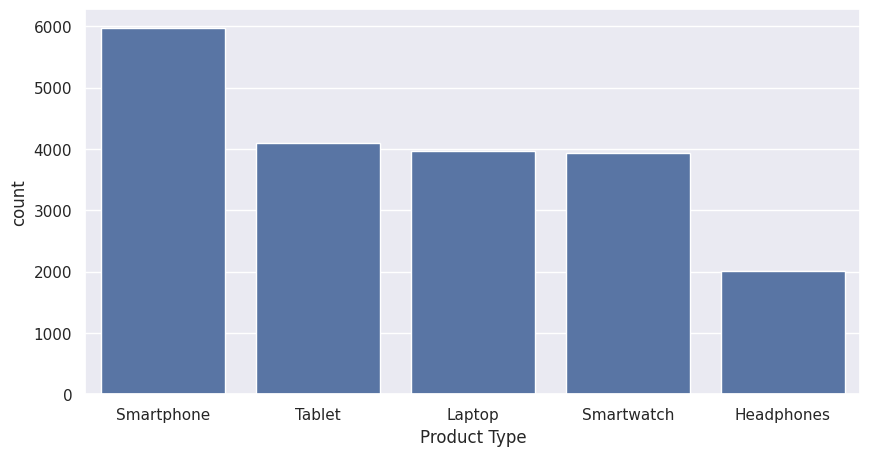

In [ ]:
#Plot countplot for Outlet_Size column
plt.figure(figsize=(10,5))
sns.countplot(x= "Product Type" , data=data)
plt.show()

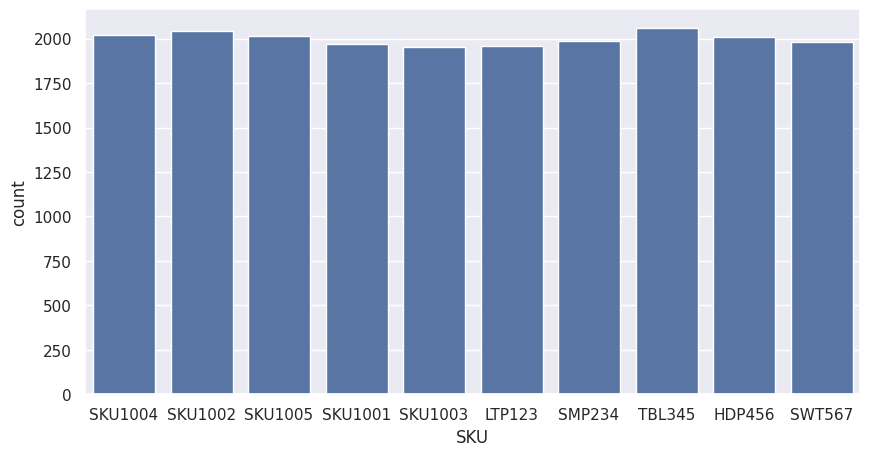

In [ ]:
#Plot countplot for Outlet_Location_Type column
plt.figure(figsize=(10,5))
sns.countplot(x= "SKU" , data=data)
plt.show()

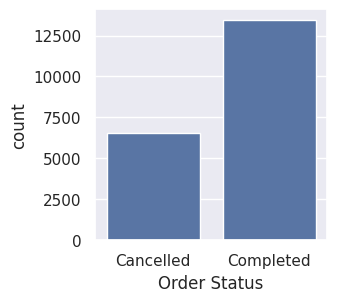

In [ ]:
#Plot countplot for Outlet_Type column
plt.figure(figsize=(3,3))
sns.countplot(x= "Order Status" , data=data)
plt.show()

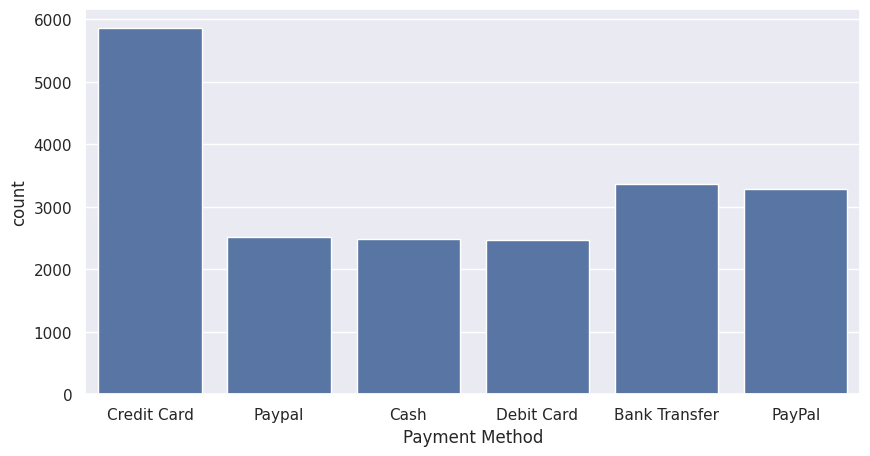

In [ ]:
#Plot countplot for Outlet_Type column
plt.figure(figsize=(10,5))
sns.countplot(x= "Payment Method" , data=data)
plt.show()

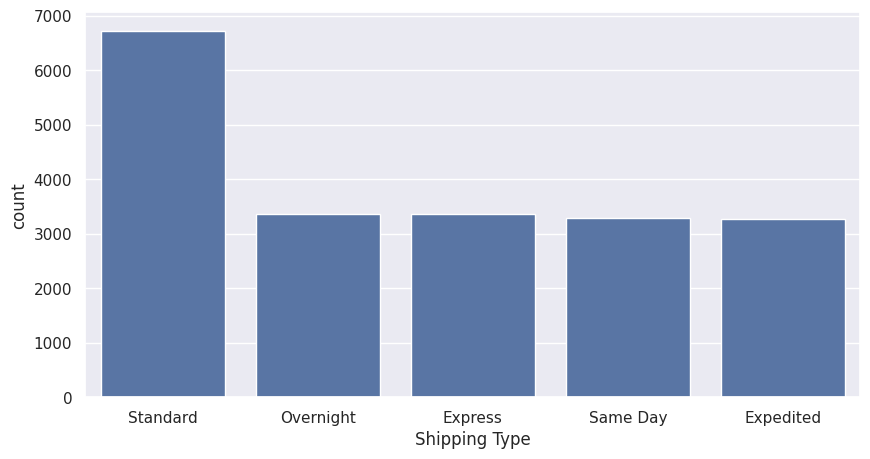

In [ ]:
#Plot countplot for Outlet_Type column
plt.figure(figsize=(10,5))
sns.countplot(x= "Shipping Type" , data=data)
plt.show()

**Data Preprocessing**

In [ ]:
#see categories in product type column
data['Product Type'].value_counts()

,count
Product Type,
Smartphone,5978
Tablet,4104
Laptop,3973
Smartwatch,3934
Headphones,2011


In [ ]:
#see categories in SKU type column
data['SKU'].value_counts()

,count
SKU,
TBL345,2062
SKU1002,2042
SKU1004,2019
SKU1005,2012
HDP456,2010
SMP234,1987
SWT567,1980
SKU1001,1972
LTP123,1961


In [ ]:
data['SKU'] = data['SKU'].replace({'SKU1001': 'SKU','SKU1002': 'SKU', 'SKU1003':'SKU', 'SKU1004':'SKU', 'SKU1005':'SKU', 'TBL345':'TBL', 'HDP456':'HDP','SMP234':'SMP','SWT567':'SWT','LTP123':'LTP'})

In [ ]:
data

,Gender,Loyalty Member,Product Type,SKU,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type
0,Male,No,Smartphone,SKU,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard
1,Male,No,Tablet,SKU,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight
2,Male,No,Laptop,SKU,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express
3,Male,Yes,Smartphone,SKU,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight
4,Male,Yes,Smartphone,SKU,Completed,Cash,41.50,20.75,2,2024-05-21,Express
...,...,...,...,...,...,...,...,...,...,...,...
19995,Female,No,Smartphone,SMP,Completed,Bank Transfer,6838.08,1139.68,6,2024-06-15,Expedited
19996,Female,Yes,Laptop,LTP,Cancelled,Credit Card,2697.28,674.32,4,2024-07-18,Standard
19997,Female,No,Headphones,HDP,Completed,Bank Transfer,1805.90,361.18,5,2024-08-26,Standard
19998,Male,No,Headphones,HDP,Cancelled,Bank Transfer,2528.26,361.18,7,2024-01-06,Expedited


In [ ]:
# Drop specified columns
data = data.drop(['Gender', 'Loyalty Member', 'SKU',	'Order Status',	'Payment Method', 'Shipping Type'], axis=1)

**Handle Categorical Features**

In [ ]:
#Apply Label Encoding on categorical columns
le = LabelEncoder()

data['Product Type'] = le.fit_transform(data['Product Type'])

data['Purchase Date'] = le.fit_transform(data['Purchase Date'])

In [ ]:
data.head(10)

,Product Type,Total Price,Unit Price,Quantity,Purchase Date
0,2,5538.33,791.19,7,178
1,4,741.09,247.03,3,209
2,1,1855.84,463.96,4,23
3,2,3164.76,791.19,4,320
4,2,41.50,20.75,2,240
5,2,83.00,20.75,4,245
6,3,7603.47,844.83,9,128
7,1,4175.64,463.96,9,274
8,2,5538.33,791.19,7,9
9,1,4175.64,463.96,9,99


In [ ]:
#see categories in product type column
data['Product Type'].value_counts()

,count
Product Type,
2,5978
4,4104
1,3973
3,3934
0,2011


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product Type   20000 non-null  int64  
 1   Total Price    20000 non-null  float64
 2   Unit Price     20000 non-null  float64
 3   Quantity       20000 non-null  int64  
 4   Purchase Date  20000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 781.4 KB


**Data Scaling using StandardScaler**

In [ ]:
#sc = StandardScaler()

#data['Total Price'] = sc.fit_transform(data['Total Price'].values.reshape(-1,1))

#data['Unit Price'] = sc.fit_transform(data['Unit Price'].values.reshape(-1,1))

#data['Quantity'] = sc.fit_transform(data['Quantity'].values.reshape(-1,1))

data.head(10)

,Product Type,Total Price,Unit Price,Quantity,Purchase Date
0,2,5538.33,791.19,7,178
1,4,741.09,247.03,3,209
2,1,1855.84,463.96,4,23
3,2,3164.76,791.19,4,320
4,2,41.50,20.75,2,240
5,2,83.00,20.75,4,245
6,3,7603.47,844.83,9,128
7,1,4175.64,463.96,9,274
8,2,5538.33,791.19,7,9
9,1,4175.64,463.96,9,99


**Seperate Features from Label**

In [ ]:
#sepertate features and target

Features = data.drop(columns=['Total Price'])

Target = data['Total Price']

In [ ]:
Features

,Product Type,Unit Price,Quantity,Purchase Date
0,2,791.19,7,178
1,4,247.03,3,209
2,1,463.96,4,23
3,2,791.19,4,320
4,2,20.75,2,240
...,...,...,...,...
19995,2,1139.68,6,265
19996,1,674.32,4,298
19997,0,361.18,5,337
19998,0,361.18,7,104


In [ ]:
Target

,Total Price
0,5538.33
1,741.09
2,1855.84
3,3164.76
4,41.50
...,...
19995,6838.08
19996,2697.28
19997,1805.90
19998,2528.26


**Split data into train and test sets**

In [ ]:
#splittting data into training and testing data
Features_train,Features_test,Target_train,Target_test = train_test_split(Features,Target,test_size=0.2,random_state=42)

In [ ]:
#print shape of features and training and testing data of features
print("Shape of Features:",Features.shape)
print("Shape of Features_train:",Features_train.shape)
print("Shape of Features_test:",Features_test.shape)

Shape of Features: (20000, 4)
Shape of Features_train: (16000, 4)
Shape of Features_test: (4000, 4)


In [ ]:
#print shape of Target and training and testing data of Target
print("Shape of Target:",Target.shape)
print("Shape of Target_train:",Target_train.shape)
print("Shape of Target_test:",Target_test.shape)

Shape of Target: (20000,)
Shape of Target_train: (16000,)
Shape of Target_test: (4000,)


**Building Model**

**Random Forest Regressor**

In [ ]:
#build model with RandomForestRegressor
print("Random Forest Regressor")
Randommodel = RandomForestRegressor()

#fit the model
Randommodel.fit(Features_train,Target_train)

#predict the model
Target_pred_ran = Randommodel.predict(Features_test)

#calculate R-Squared
r2_score = metrics.r2_score(Target_test,Target_pred_ran)
print("R-Squared:",r2_score*100,"%")

#calculate Mean Absolute Error
mae = metrics.mean_absolute_error(Target_test,Target_pred_ran)
print("Mean Absolute Error:",mae)

#calculate Mean Squared Error
mse = metrics.mean_squared_error(Target_test,Target_pred_ran)
print("Mean Squared Error:",mse)

#Calculate accuracy of the model
accuracy_random = Randommodel.score(Features_test,Target_test)
print("Accuracy:",accuracy_random*100,"%")


Random Forest Regressor
R-Squared: 100.0 %
Mean Absolute Error: 5.102002376133896e-12
Mean Squared Error: 6.00291451053623e-23
Accuracy: 100.0 %


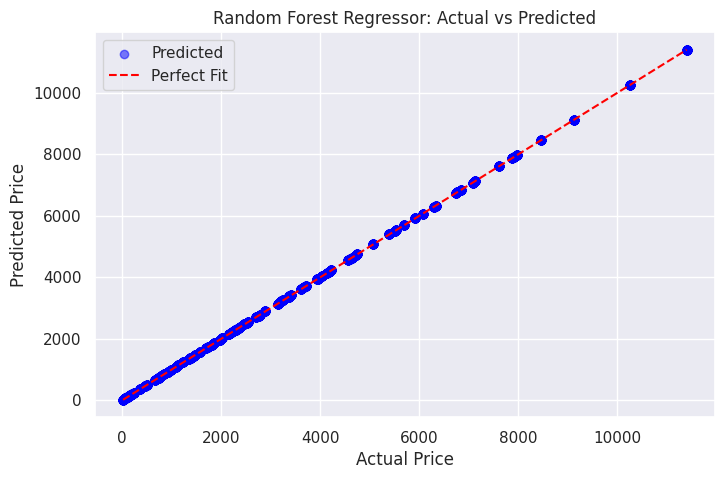

In [ ]:
# Plotting actual vs. predicted values
plt.figure(figsize=(8, 5))
plt.scatter(Target_test, Target_pred_ran, alpha=0.5, color='blue', label='Predicted')
plt.plot([min(Target_test), max(Target_test)], [min(Target_test), max(Target_test)], color='red', linestyle='--', label='Perfect Fit')
plt.title('Random Forest Regressor: Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.grid(True)
plt.show()

**SVR Mode**

In [ ]:
#build model with SVLRegressor
print("SVL Regressor")
model = SVR()

#fit the model
model.fit(Features_train,Target_train)

#predict the model
Target_pred_svr = model.predict(Features_test)

#calculate R-Squared
r2_score = metrics.r2_score(Target_test,Target_pred_svr)
print("R-Squared:",r2_score)

#calculate Mean Absolute Error
mae = metrics.mean_absolute_error(Target_test,Target_pred_svr)
print("Mean Absolute Error:",mae)

#calculate Mean Squared Error
mse = metrics.mean_squared_error(Target_test,Target_pred_svr)
print("Mean Squared Error:",mse)

#Calculate accuracy of the model
accuracy_svr = model.score(Features_test,Target_test)
print("Accuracy:",accuracy_svr*100,"%")

SVL Regressor
R-Squared: 0.3237825767991781
Mean Absolute Error: 1591.673331082967
Mean Squared Error: 4368886.729557577
Accuracy: 32.37825767991781 %


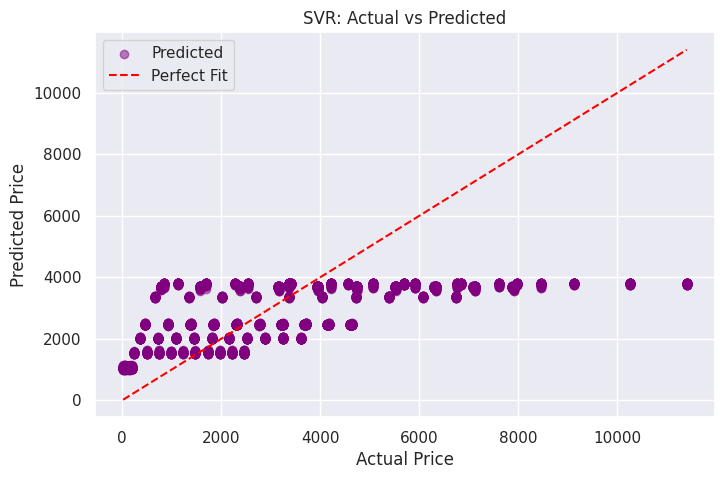

In [ ]:
# Plotting actual vs. predicted values
plt.figure(figsize=(8, 5))
plt.scatter(Target_test, Target_pred_svr, alpha=0.5, color='purple', label='Predicted')
plt.plot([min(Target_test), max(Target_test)], [min(Target_test), max(Target_test)], color='red', linestyle='--', label='Perfect Fit')
plt.title('SVR: Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.grid(True)
plt.show()

**GradientBoostingRegressor**

In [ ]:
#build model with GradientBoostingRegressor
print("Gradient Boosting Regressor")
model = GradientBoostingRegressor()

#fit the model
model.fit(Features_train,Target_train)

#predict the model
Target_pred_gradboost = model.predict(Features_test)

#calculate R-Squared
r2_score = metrics.r2_score(Target_test,Target_pred_gradboost)
print("R-Squared:",r2_score)

#calculate Mean Absolute Error
mae = metrics.mean_absolute_error(Target_test,Target_pred_gradboost)
print("Mean Absolute Error:",mae)

#calculate Mean Squared Error
mse = metrics.mean_squared_error(Target_test,Target_pred_gradboost)
print("Mean Squared Error:",mse)

#Calculate accuracy of the model
accuracy_gb = model.score(Features_test,Target_test)
print("Accuracy:",accuracy_gb*100,"%")

Gradient Boosting Regressor
R-Squared: 0.9996987195122711
Mean Absolute Error: 30.293262608350933
Mean Squared Error: 1946.5045997824839
Accuracy: 99.9698719512271 %


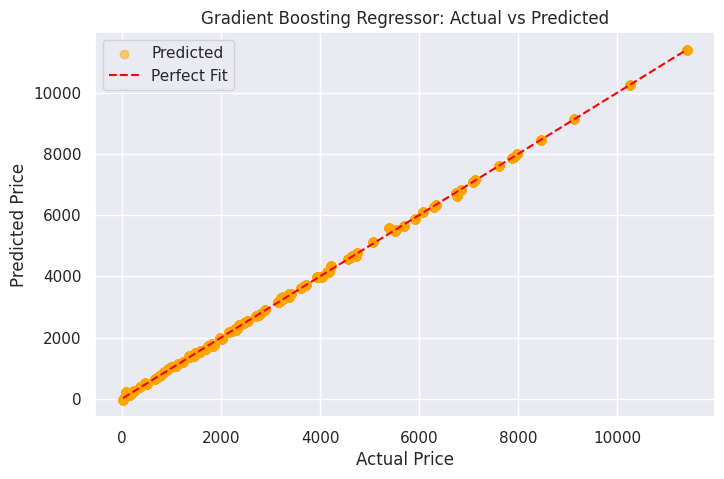

In [ ]:
# Plotting actual vs. predicted values
plt.figure(figsize=(8, 5))
plt.scatter(Target_test, Target_pred_gradboost, alpha=0.5, color='orange', label='Predicted')
plt.plot([min(Target_test), max(Target_test)], [min(Target_test), max(Target_test)], color='red', linestyle='--', label='Perfect Fit')
plt.title('Gradient Boosting Regressor: Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
print("Linear Regression")
model = LinearRegression()

# Fit the model to the training data
model.fit(Features_train, Target_train)

# Make predictions on the test data
Target_pred_linear = model.predict(Features_test)

# Evaluate the model
r2_score = metrics.r2_score(Target_test, Target_pred_linear)
print("R-Squared:", r2_score)

mae = metrics.mean_absolute_error(Target_test, Target_pred_linear)
print("Mean Absolute Error:", mae)

mse = metrics.mean_squared_error(Target_test, Target_pred_linear)
print("Mean Squared Error:", mse)

accuracy_linear = model.score(Features_test, Target_test)
print("Accuracy:", accuracy_linear * 100,"%")

Linear Regression
R-Squared: 0.8746716137199254
Mean Absolute Error: 668.2524589340638
Mean Squared Error: 809718.1540577881
Accuracy: 87.46716137199255 %


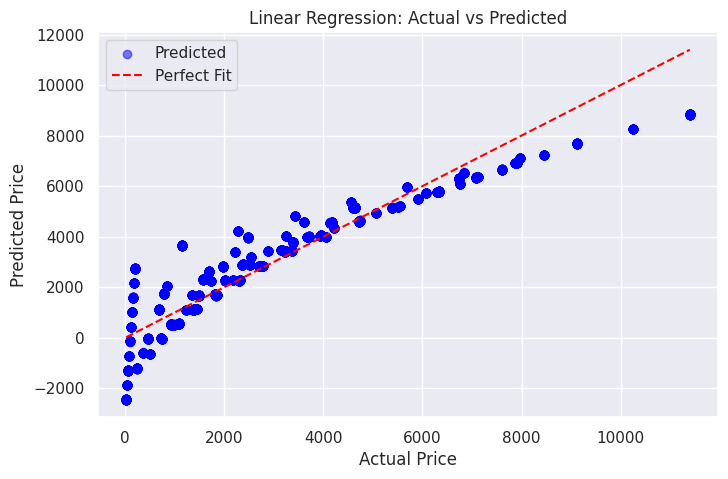

In [ ]:
# Plotting actual vs. predicted values
plt.figure(figsize=(8, 5))
plt.scatter(Target_test, Target_pred_linear, alpha=0.5, color='blue', label='Predicted')
plt.plot([min(Target_test), max(Target_test)], [min(Target_test), max(Target_test)], color='red', linestyle='--', label='Perfect Fit')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.grid(True)
plt.show()

**Comparing all models**

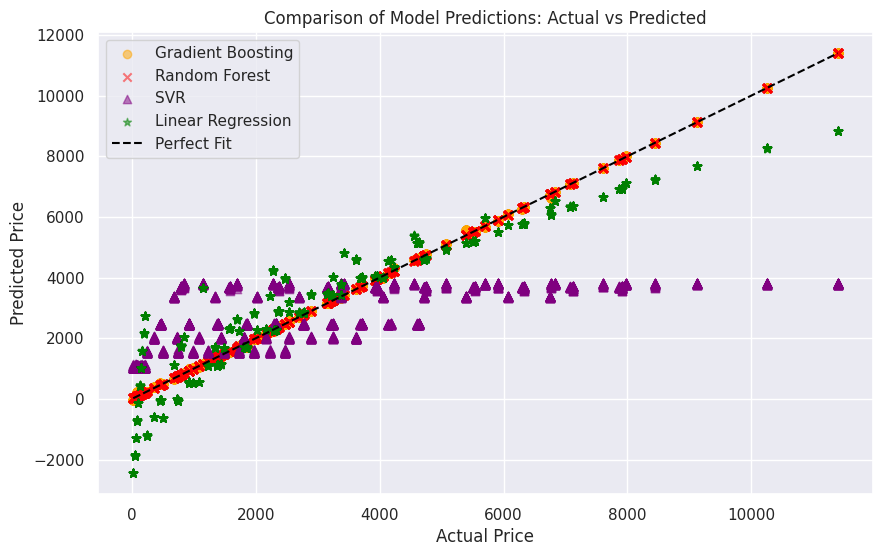

In [ ]:
plt.figure(figsize=(10, 6))

# Plotting each model's predictions
plt.scatter(Target_test, Target_pred_gradboost, alpha=0.5, color='orange', label='Gradient Boosting', marker='o')
plt.scatter(Target_test, Target_pred_ran, alpha=0.5, color='red', label='Random Forest', marker='x')
plt.scatter(Target_test, Target_pred_svr, alpha=0.5, color='purple', label='SVR', marker='^')
plt.scatter(Target_test, Target_pred_linear, alpha=0.5, color='green', label='Linear Regression', marker='*')

# Plot the perfect fit line
plt.plot([min(Target_test), max(Target_test)], [min(Target_test), max(Target_test)], color='black', linestyle='--', label='Perfect Fit')

# Graph details
plt.title('Comparison of Model Predictions: Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))

# Plotting the bar chart with different colors
colors = ['blue', 'green', 'purple', 'orange', 'red']
plt.bar(accuracy_random, color="green")

# Adding graph details
plt.title('Model Accuracy Comparison', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1)  # Assuming accuracy values range between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Display the bar chart
plt.show()

TypeError: bar() missing 1 required positional argument: 'height'

<Figure size 1000x600 with 0 Axes>

**Best Model**

In [ ]:
#save the random forest model

import joblib

# Assuming 'Randommodel' is your trained RandomForestRegressor
# Save the model to a file
joblib.dump(Randommodel, 'random_forest_model.pkl')

['random_forest_model.pkl']

**Make a predictive System**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from joblib import load

# Load the trained model
loaded_model = load('/content/random_forest_model.pkl')

# Sample input data (replace with your actual input)
input_data = pd.DataFrame({
    'Product Type': ['Smartphone'],
    'Unit Price': [247.19],
    'Quantity': [3],
    'Purchase Date': ['2024-03-20'],
})

# Preprocessing steps (mirroring the training data preprocessing)
le = LabelEncoder()
for col in ['Product Type']:
    input_data[col] = le.fit_transform(input_data[col])

input_data['Purchase Date'] = le.fit_transform(input_data['Purchase Date'])


# Make a prediction
prediction = loaded_model.predict(input_data)
predicted_value = prediction[0]
print("Predicted Total Price:", predicted_value)


Predicted Total Price: 728.4827999999991


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from joblib import load

# Load the trained model
loaded_model = load('/content/random_forest_model.pkl')

# Sample input data (replace with your actual input)
input_data = pd.DataFrame({
    'Product Type': ['Laptop'],
    'Unit Price': [9019],
    'Quantity': [4],
    'Purchase Date': ['2024-03-10'],
})

# Preprocessing steps (mirroring the training data preprocessing)
le = LabelEncoder()
for col in ['Product Type']:
    input_data[col] = le.fit_transform(input_data[col])

input_data['Purchase Date'] = le.fit_transform(input_data['Purchase Date'])


# Make a prediction
prediction = loaded_model.predict(input_data)
predicted_value = prediction[0]
print("Predicted Total Price:", predicted_value)


Predicted Total Price: 4480.885599999989


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from joblib import load

# Load the trained model
loaded_model = load('/content/random_forest_model.pkl')

# Sample input data (replace with your actual input)
input_data = pd.DataFrame({
    'Product Type': ['Tablet'],
    'Unit Price': [1009],
    'Quantity': [3],
    'Purchase Date': ['2024-05-10'],
})

# Preprocessing steps (mirroring the training data preprocessing)
le = LabelEncoder()
for col in ['Product Type']:
    input_data[col] = le.fit_transform(input_data[col])

input_data['Purchase Date'] = le.fit_transform(input_data['Purchase Date'])


# Make a prediction
prediction = loaded_model.predict(input_data)
predicted_value = prediction[0]
print("Predicted Total Price:", predicted_value)


Predicted Total Price: 3039.0405
